# **Dataset 5**

### **Import Packages**

In [1]:
import multiprocessing
import subprocess
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from Data_Generation.data_synthesizer import ds_generate_data
from Data_Generation.synthetic_data_vault import sdv_generate_data
from Data_Evaluation.utility import run_utility_eval
from Data_Evaluation.resemblance import pairwise_correlation_diff, jsd, wd
from Data_Evaluation.privacy import dcr, nndr, mia

### **Exploratory Data Analysis**

In [2]:
data_path = "Original_Data/Dataset_5.csv"
original_data = pd.read_csv(data_path)
original_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [3]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
original_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
original_data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [6]:
# Check categorical columns
categorical_cols = original_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(col, original_data[col].unique())

school ['GP' 'MS']
sex ['F' 'M']
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Fjob ['teacher' 'other' 'services' 'health' 'at_home']
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']
schoolsup ['yes' 'no']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['no' 'yes']
romantic ['no' 'yes']


<Axes: xlabel='G3', ylabel='Count'>

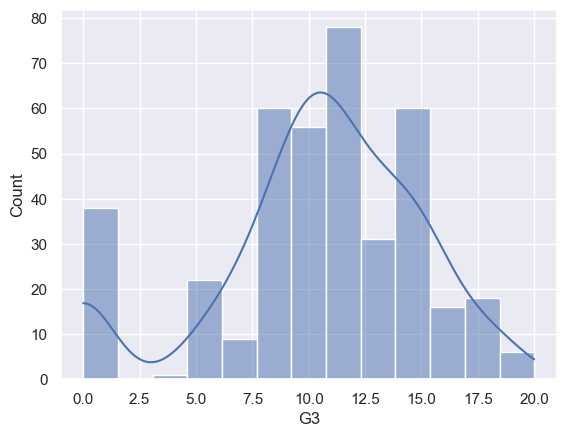

In [7]:
# Check class distribution
sns.histplot(original_data['G3'], kde=True)

### **Synthetic Data Generation**

In [8]:
# Set the start method of the multiprocessing module to 'fork' to avoid an error
multiprocessing.set_start_method('fork', force=True)

# Number of samples to generate
n = 5000

train_data, test_data = train_test_split(original_data, test_size=0.3, random_state=42)
train_data.to_csv("Original_Data/train_data.csv", index=False)
test_data.to_csv("Original_Data/test_data.csv", index=False)

In [9]:
# Use train_data.csv to fit SDG models and generate synthetic data
data_path = "Original_Data/train_data.csv"
arguments = [data_path, str(n)]

print("Sampling synthpop...")
result = subprocess.run(['Rscript', 'Data_Generation/synthpop.R',   *arguments], capture_output=True, text=True)

print("Sampling DataSynthesizer...")
ds_generate_data(data_path=data_path, num_samples=n)

sdv_generate_data(data_path=data_path, num_samples=n)

Sampling synthpop...
Sampling DataSynthesizer...
================ Constructing Bayesian Network (BN) ================
Adding ROOT freetime
Adding attribute paid
Adding attribute famrel
Adding attribute nursery
Adding attribute schoolsup
Adding attribute guardian
Adding attribute internet
Adding attribute traveltime
Adding attribute G1
Adding attribute G3
Adding attribute Mjob
Adding attribute Dalc
Adding attribute failures
Adding attribute famsup
Adding attribute absences
Adding attribute sex
Adding attribute age
Adding attribute school
Adding attribute Walc
Adding attribute romantic
Adding attribute health
Adding attribute G2
Adding attribute activities
Adding attribute Fedu
Adding attribute higher
Adding attribute address
Adding attribute reason
Adding attribute famsize
Adding attribute goout
Adding attribute Fjob
Adding attribute Medu
Adding attribute Pstatus
Adding attribute studytime
========================== BN constructed ==========================


/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sdv/single_table/base.py:97: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Fitting copula_gan...

Time taken to fit copula_gan: 11.46 seconds

Fitting ctgan...

Time taken to fit ctgan: 10.50 seconds

Fitting tvae...

Time taken to fit tvae: 2.56 seconds

Fitting gaussian_copula...

Time taken to fit gaussian_copula: 0.71 seconds



Encode all categorical columns of both original (train+test) data and synthetic data using label encoding

In [10]:
synthpop = pd.read_csv("Synthetic_Data/synthpop_samples.csv")
ds = pd.read_csv("Synthetic_Data/ds_samples.csv")
tvae = pd.read_csv("Synthetic_Data/tvae_samples.csv")
gaussian_copula = pd.read_csv("Synthetic_Data/gaussian_samples.csv")
copula_gan = pd.read_csv("Synthetic_Data/copula_gan_samples.csv")
ctgan = pd.read_csv("Synthetic_Data/ctgan_samples.csv")

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.fit_transform(test_data[col])

    synthpop[col] = le.fit_transform(synthpop[col])
    ds[col] = le.fit_transform(ds[col])
    tvae[col] = le.fit_transform(tvae[col])
    gaussian_copula[col] = le.fit_transform(gaussian_copula[col])
    copula_gan[col] = le.fit_transform(copula_gan[col])
    ctgan[col] = le.fit_transform(ctgan[col])

    label_encoders[col] = le


In [11]:
ctgan.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,17,1,1,1,1,4,4,2,1,0,1,1,0,0,0,1,1,1,1,0,1,1,3,4,1,1,5,8,13,12,11
1,0,0,18,1,0,1,2,2,4,2,0,1,1,2,0,0,1,1,0,1,1,0,0,4,2,4,2,1,1,4,5,7,6
2,0,1,17,1,0,1,2,2,0,2,2,1,2,2,3,0,0,0,1,1,0,1,1,4,3,3,1,3,5,4,11,13,0
3,0,0,17,1,1,1,4,2,3,2,3,1,2,2,1,0,0,0,0,1,1,1,0,5,2,2,1,2,3,7,10,11,0
4,0,0,16,0,0,1,4,1,1,2,2,0,1,2,0,0,1,1,1,0,1,1,1,5,2,4,2,1,1,8,10,10,6


### **Utility Evaluation**

Prepare utility evaluation

In [12]:
models = [synthpop, ds, tvae, gaussian_copula, copula_gan, ctgan]
model_names = ["synthpop", "ds", "tvae", "gaussian_copula", "copula_gan", "ctgan"]
target_col = "G3"

Run random forest classifier for utility evaluation

In [13]:
rf_results = {}
for i, model in enumerate(models):
    print("Model: ", model_names[i])
    rf_results[model_names[i]] = run_utility_eval(train_data, test_data, model, target_col, "random_forest")
    print(rf_results[model_names[i]])

Model:  synthpop


/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

{'acc_original': 0.36134453781512604, 'f1_original': 0.3342638412720237, 'acc_synth': 0.3697478991596639, 'f1_synth': 0.3225641133646441, 'acc_diff': -0.00840336134453784, 'f1_diff': 0.011699727907379609}
Model:  ds


/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitali

{'acc_original': 0.36134453781512604, 'f1_original': 0.3342638412720237, 'acc_synth': 0.08403361344537816, 'f1_synth': 0.06883515035688947, 'acc_diff': 0.2773109243697479, 'f1_diff': 0.2654286909151342}
Model:  tvae


/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

{'acc_original': 0.36134453781512604, 'f1_original': 0.3342638412720237, 'acc_synth': 0.05042016806722689, 'f1_synth': 0.03280193797949287, 'acc_diff': 0.31092436974789917, 'f1_diff': 0.3014619032925308}
Model:  gaussian_copula


/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

{'acc_original': 0.36134453781512604, 'f1_original': 0.3342638412720237, 'acc_synth': 0.15966386554621848, 'f1_synth': 0.1363092975442263, 'acc_diff': 0.20168067226890757, 'f1_diff': 0.1979545437277974}
Model:  copula_gan


/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitali

{'acc_original': 0.36134453781512604, 'f1_original': 0.3342638412720237, 'acc_synth': 0.04201680672268908, 'f1_synth': 0.01777634130575307, 'acc_diff': 0.31932773109243695, 'f1_diff': 0.3164874999662706}
Model:  ctgan
{'acc_original': 0.36134453781512604, 'f1_original': 0.3342638412720237, 'acc_synth': 0.07563025210084033, 'f1_synth': 0.032467532467532464, 'acc_diff': 0.2857142857142857, 'f1_diff': 0.3017963088044912}


/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

Run logistic regression for utility evaluation

In [14]:
lr_results = {}
for i, model in enumerate(models):
    lr_results[model_names[i]] = run_utility_eval(train_data, test_data, model, target_col, "logistic_regression")

for name in model_names:
    print(name)
    print(lr_results[name], "\n")

/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedM

synthpop
{'acc_original': 0.36134453781512604, 'f1_original': 0.3496107853029569, 'acc_synth': 0.3865546218487395, 'f1_synth': 0.36627137754391725, 'acc_diff': -0.025210084033613467, 'f1_diff': -0.016660592240960337} 

ds
{'acc_original': 0.36134453781512604, 'f1_original': 0.3496107853029569, 'acc_synth': 0.05042016806722689, 'f1_synth': 0.03439319301388267, 'acc_diff': 0.31092436974789917, 'f1_diff': 0.31521759228907426} 

tvae
{'acc_original': 0.36134453781512604, 'f1_original': 0.3496107853029569, 'acc_synth': 0.07563025210084033, 'f1_synth': 0.052309781721546426, 'acc_diff': 0.2857142857142857, 'f1_diff': 0.2973010035814105} 

gaussian_copula
{'acc_original': 0.36134453781512604, 'f1_original': 0.3496107853029569, 'acc_synth': 0.12605042016806722, 'f1_synth': 0.11117684836172233, 'acc_diff': 0.23529411764705882, 'f1_diff': 0.2384339369412346} 

copula_gan
{'acc_original': 0.36134453781512604, 'f1_original': 0.3496107853029569, 'acc_synth': 0.05042016806722689, 'f1_synth': 0.005500

/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedM

Run multilayer perceptron (MLP)

In [15]:
mlp_results = {}
for i, model in enumerate(models):
    mlp_results[model_names[i]] = run_utility_eval(train_data, test_data, model, target_col, "multilayer_perceptron")

for name in model_names:
    print(name)
    print(mlp_results[name], "\n")

/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/sit

synthpop
{'acc_original': 0.29411764705882354, 'f1_original': 0.2836548224213486, 'acc_synth': 0.3865546218487395, 'f1_synth': 0.3567103093903967, 'acc_diff': -0.09243697478991597, 'f1_diff': -0.07305548696904812} 

ds
{'acc_original': 0.29411764705882354, 'f1_original': 0.2836548224213486, 'acc_synth': 0.06722689075630252, 'f1_synth': 0.04753751527014607, 'acc_diff': 0.22689075630252103, 'f1_diff': 0.23611730715120252} 

tvae
{'acc_original': 0.29411764705882354, 'f1_original': 0.2836548224213486, 'acc_synth': 0.05042016806722689, 'f1_synth': 0.037671208834410955, 'acc_diff': 0.24369747899159666, 'f1_diff': 0.24598361358693765} 

gaussian_copula
{'acc_original': 0.29411764705882354, 'f1_original': 0.2836548224213486, 'acc_synth': 0.1092436974789916, 'f1_synth': 0.08116956184183075, 'acc_diff': 0.18487394957983194, 'f1_diff': 0.20248526057951785} 

copula_gan
{'acc_original': 0.29411764705882354, 'f1_original': 0.2836548224213486, 'acc_synth': 0.07563025210084033, 'f1_synth': 0.0555279

/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packag

### **Resemblance**

Run multiple resemblance metrics: Difference in pairwise correlation, Jensen-Shannon divergence, Wasserstein distance

- Correlation distance diff : lower values are better
- JSD in [0,1] range: lower values are better
- WD: lower values are better


**Difference in pairwise correlation:**

In [16]:
for i, model in enumerate(models):
    print("Model: ", model_names[i])
    print("Difference in pairwise correlation: ", pairwise_correlation_diff(train_data, model))

Model:  synthpop
Difference in pairwise correlation:  0.04267214078470372
Model:  ds
Difference in pairwise correlation:  0.12265899070305314
Model:  tvae
Difference in pairwise correlation:  0.09685214933184057
Model:  gaussian_copula
Difference in pairwise correlation:  0.07404604487946319
Model:  copula_gan
Difference in pairwise correlation:  0.08767301965240124
Model:  ctgan
Difference in pairwise correlation:  0.08655868477223011


**Jensen-Shannon Divergence**

In [17]:
for i, model in enumerate(models):
    print("Model: ", model_names[i])
    print("Jensen-Shannon Divergence: ", jsd(train_data, model))

Model:  synthpop
Jensen-Shannon Divergence:  0.0003545825175750562
Model:  ds
Jensen-Shannon Divergence:  0.09237724832584694
Model:  tvae
Jensen-Shannon Divergence:  0.14263503460280938
Model:  gaussian_copula
Jensen-Shannon Divergence:  0.008596632484899808
Model:  copula_gan
Jensen-Shannon Divergence:  0.02999286490584359
Model:  ctgan
Jensen-Shannon Divergence:  0.013310206085350794


**Wasserstein Distance**

In [18]:
for i, model in enumerate(models):
    print("Model: ", model_names[i])
    print("Wasserstein Distance: ", wd(train_data, model)) 

Model:  synthpop
Wasserstein Distance:  0.007065197992816726
Model:  ds
Wasserstein Distance:  0.12792278805545765
Model:  tvae
Wasserstein Distance:  0.23089316843486354
Model:  gaussian_copula
Wasserstein Distance:  0.009373732229312178
Model:  copula_gan
Wasserstein Distance:  0.04222223681882807
Model:  ctgan
Wasserstein Distance:  0.03302592150891741


### **Privacy**

**Distance to closest record (DCR)**

In [19]:
for i, model in enumerate(models):
    print("Model: ", model_names[i])
    print("Avg. DCR: ", dcr(train_data, model, model_names[i], save_hist=True))    

Model:  synthpop
Avg. DCR:  0.29626533
Model:  ds
Avg. DCR:  0.41419342
Model:  tvae
Avg. DCR:  0.3418223
Model:  gaussian_copula
Avg. DCR:  0.29852727
Model:  copula_gan
Avg. DCR:  0.3072843
Model:  ctgan
Avg. DCR:  0.3035782


<Figure size 640x480 with 0 Axes>

**Nearest Neighbor distance ratio (NNDR)**

In [20]:
for i, model in enumerate(models):
    print("Model: ", model_names[i])
    print("Avg. NNDR: ", nndr(train_data, model))

Model:  synthpop
Avg. NNDR:  0.8782913
Model:  ds
Avg. NNDR:  0.9421107
Model:  tvae
Avg. NNDR:  0.91198534
Model:  gaussian_copula
Avg. NNDR:  0.9100025
Model:  copula_gan
Avg. NNDR:  0.9154832
Model:  ctgan
Avg. NNDR:  0.9142167


**Membership Inference Attack (MIA)**

/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiash/miniconda3/envs/bt-sdg/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

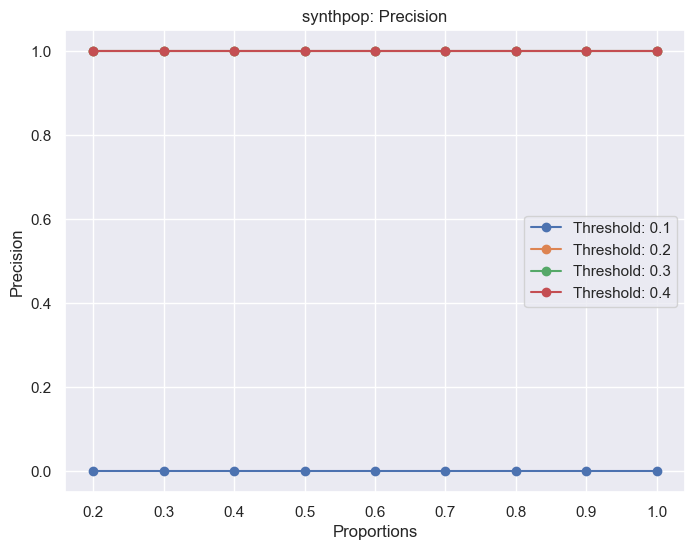

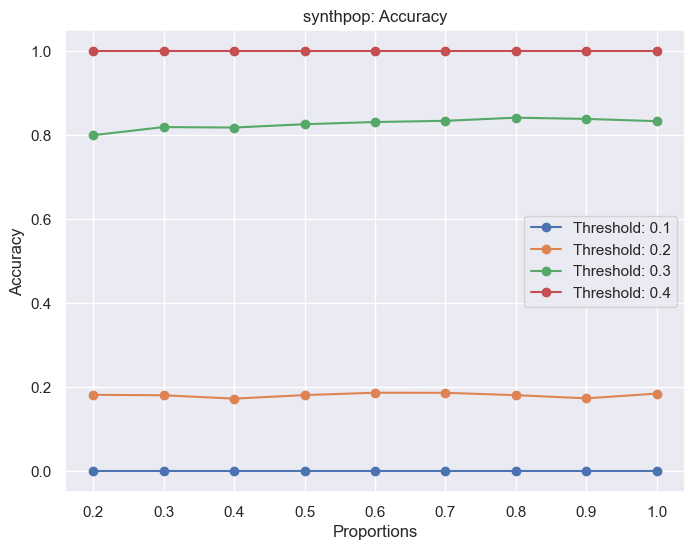

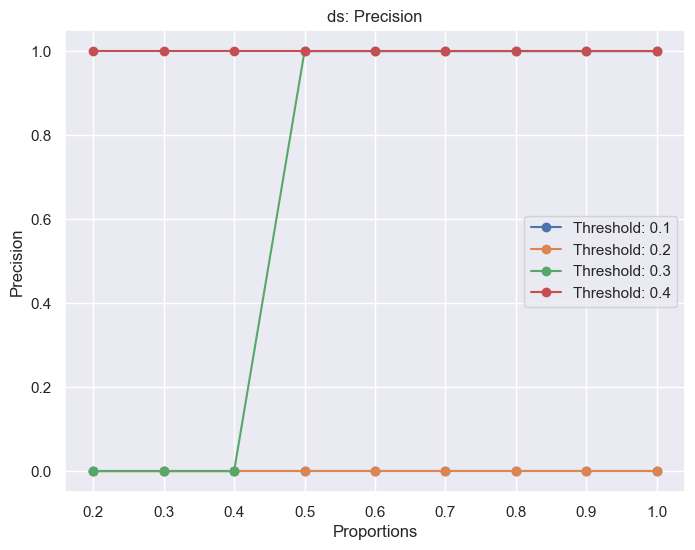

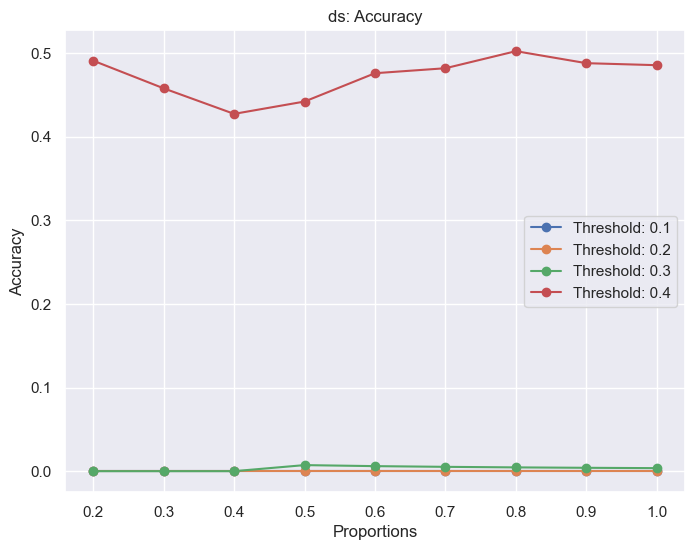

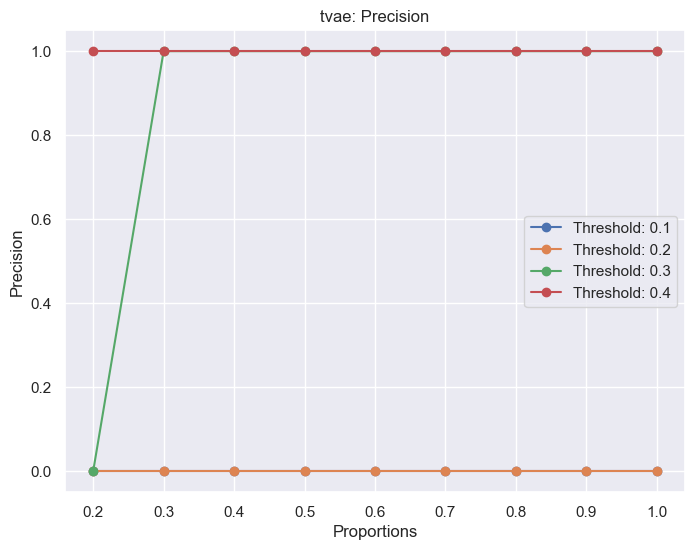

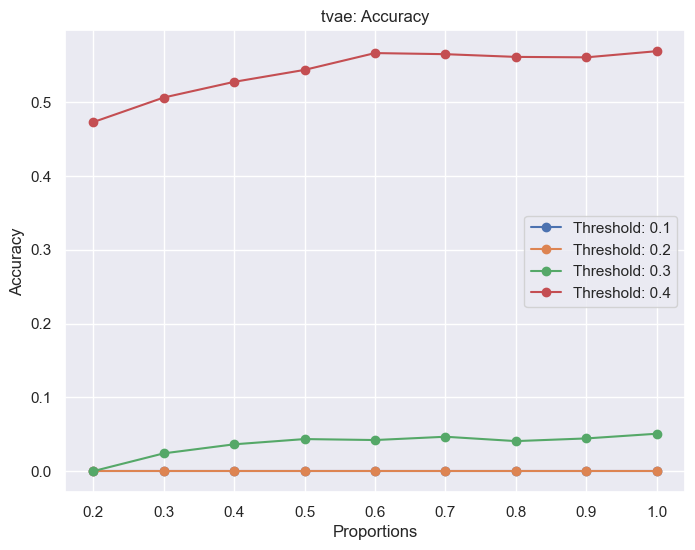

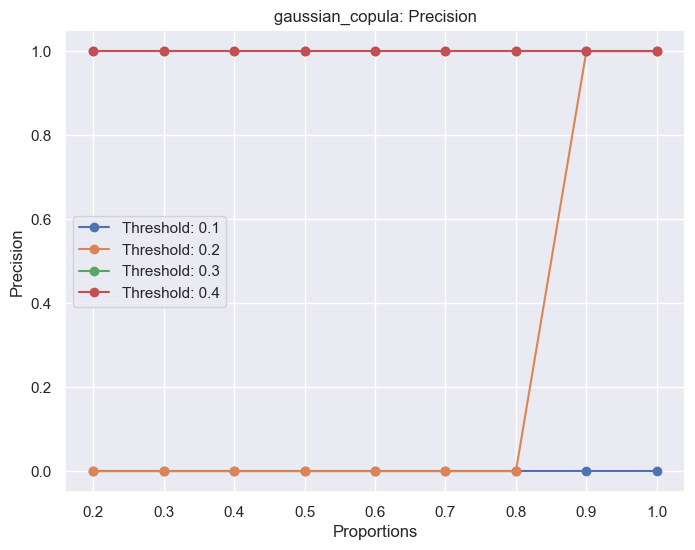

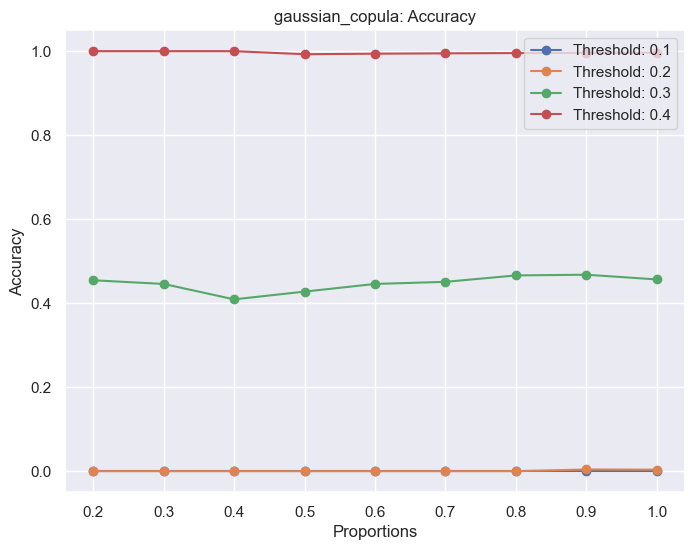

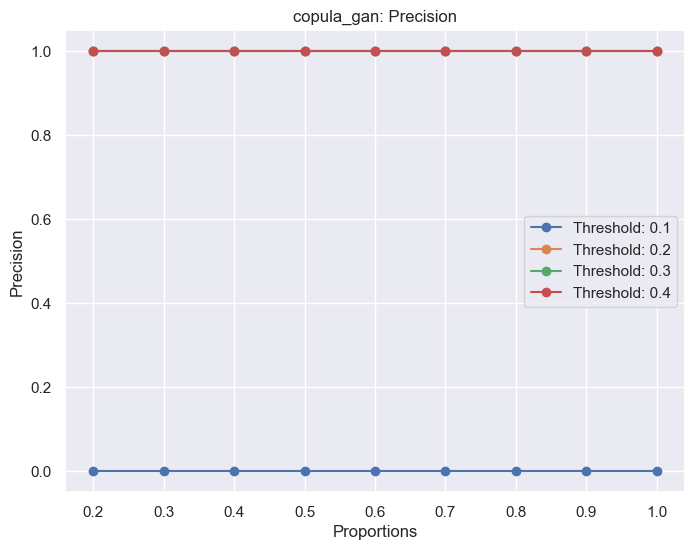

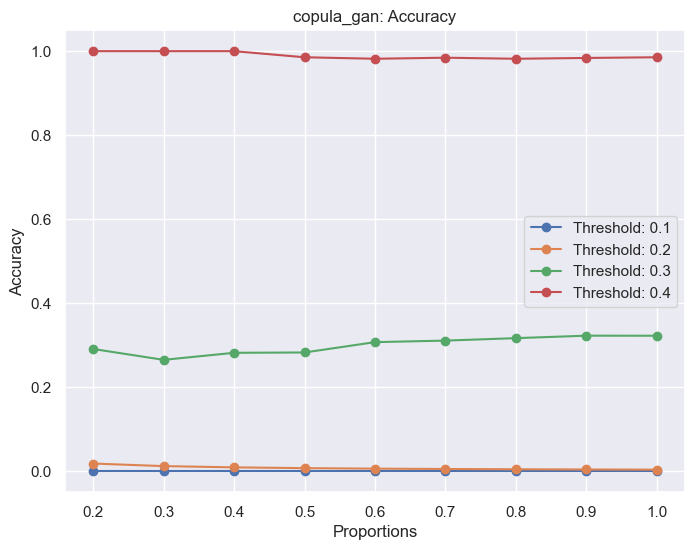

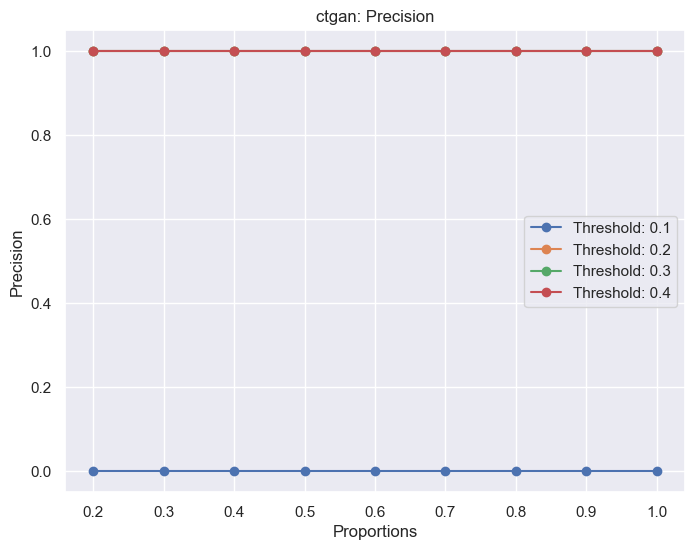

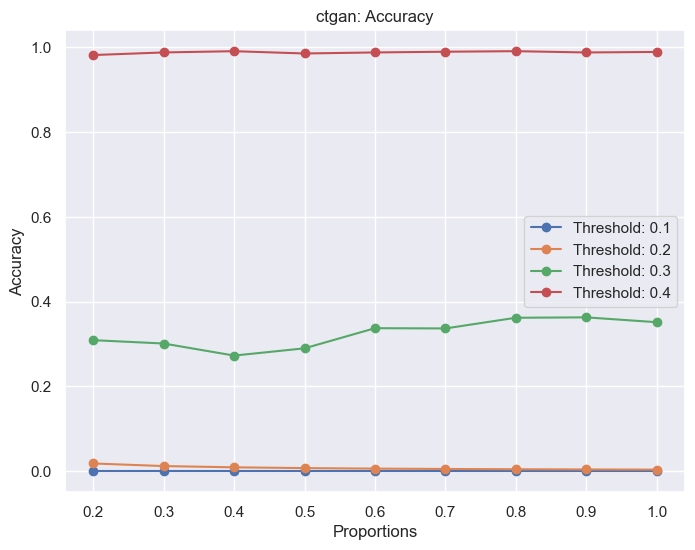

In [21]:
mia_results = {}
for i, model in enumerate(models):
    mia_results[model_names[i] + "prec"], mia_results[model_names[i] + "acc"]= mia(train_data, model, model_names[i],save_plts=True)